In [1]:
# Library imports

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import random
from sklearn.model_selection import train_test_split
import keras
from keras.models import Sequential
from keras.layers import Conv2D, MaxPooling2D, Dropout, Dense, Flatten
from keras.optimizers import Adam
from keras.callbacks import TensorBoard
from sklearn.metrics import confusion_matrix, classification_report

Using TensorFlow backend.


In [2]:
# Import the training dataset

train = pd.read_csv("fashion-mnist_train.csv")
train.head()

,label,pixel1,pixel2,pixel3,pixel4,pixel5,pixel6,pixel7,pixel8,pixel9,...,pixel775,pixel776,pixel777,pixel778,pixel779,pixel780,pixel781,pixel782,pixel783,pixel784
0,2,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,9,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,6,0,0,0,0,0,0,0,5,0,...,0,0,0,30,43,0,0,0,0,0
3,0,0,0,0,1,2,0,0,0,0,...,3,0,0,0,0,1,0,0,0,0
4,3,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [3]:
# Import the test dataset

test = pd.read_csv("fashion-mnist_test.csv")
test.head()

,label,pixel1,pixel2,pixel3,pixel4,pixel5,pixel6,pixel7,pixel8,pixel9,...,pixel775,pixel776,pixel777,pixel778,pixel779,pixel780,pixel781,pixel782,pixel783,pixel784
0,0,0,0,0,0,0,0,0,9,8,...,103,87,56,0,0,0,0,0,0,0
1,1,0,0,0,0,0,0,0,0,0,...,34,0,0,0,0,0,0,0,0,0
2,2,0,0,0,0,0,0,14,53,99,...,0,0,0,0,63,53,31,0,0,0
3,2,0,0,0,0,0,0,0,0,0,...,137,126,140,0,133,224,222,56,0,0
4,3,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


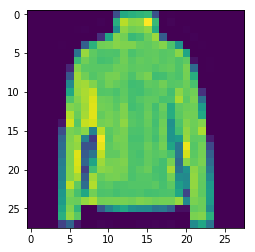

In [4]:
# See image examples

# Convert into numpy matrix for imshow
train_matrix = np.array(train, dtype='float32')
test_matrix = np.array(test, dtype='float32')

# View a random example from training set
plt.imshow(train_matrix[55, 1:].reshape(28,28))

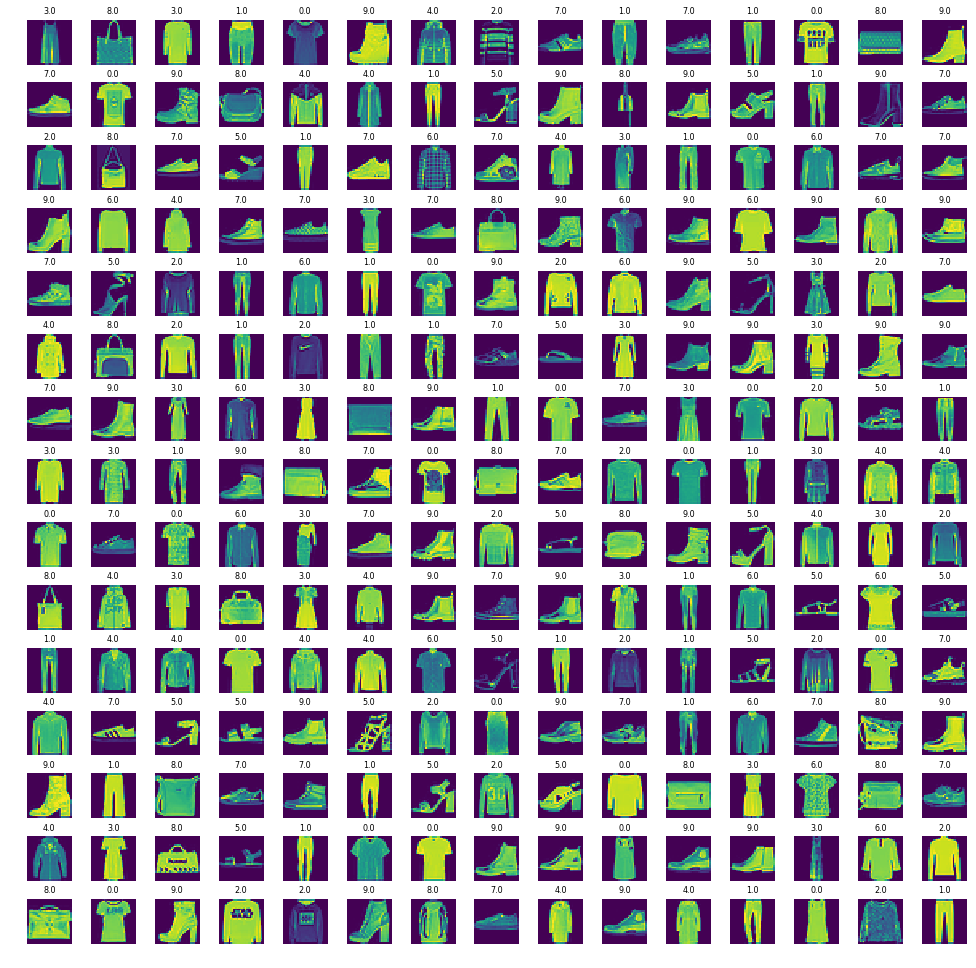

In [5]:
# Create an image matrix (15*15) with their respective class labels

# Set the length (rows) and width (columns) size of the grid
l_grid = w_grid = 15

# Create an axis for subplots
fig, ax = plt.subplots(l_grid, w_grid, figsize=(17,17))

# Flatten out the 15x15 axis in to 1x255 to loop over
ax = ax.ravel()

n_train = len(train)

for i in range(l_grid*w_grid):
    
    index = random.randint(0, n_train)
    ax[i].imshow(train_matrix[index, 1:].reshape(28,28))
    ax[i].set_title(train_matrix[index, 0], fontsize=8)
    ax[i].axis('off')

# Increase height between rows of grid to see labels clearly
plt.subplots_adjust(hspace=0.4)

In [6]:
# Split into features and target arrays

X_train = train_matrix[:, 1:]/255
y_train = train_matrix[:, 0]

X_test = test_matrix[:, 1:]/255
y_test = test_matrix[:, 0]

In [7]:
# Split training set into training and validation set (80/20 split)

X_train, X_validate, y_train, y_validate = train_test_split(X_train, y_train, test_size=0.2, random_state=12345)

In [8]:
# Reshape into 28x28x1 for feeding into neural network

X_train = X_train.reshape(X_train.shape[0], *(28,28,1))
X_test = X_test.reshape(X_test.shape[0], *(28,28,1))
X_validate = X_validate.reshape(X_validate.shape[0], *(28,28,1))

In [9]:
# Instantiate the model

model = Sequential()

In [10]:
# Add the convolutional layer with relu activation function

model.add(Conv2D(filters=32, kernel_size=(3, 3), activation='relu'))

In [11]:
# Add the MaxPooling layer with size 2x2

model.add(MaxPooling2D(pool_size=(2, 2)))

In [12]:
# Flatten the inputs for the fully connected network

model.add(Flatten())

In [13]:
# Add a hidden layer with 32 nodes

model.add(Dense(units=32, activation='relu'))

In [14]:
# Add an output layer with 10 outputs

model.add(Dense(units=10, activation='sigmoid'))

In [15]:
# Compile the model

model.compile(optimizer=Adam(lr=0.001), loss='sparse_categorical_crossentropy', metrics=['accuracy'])

In [16]:
# Fit the model

model.fit(x=X_train, y=y_train, batch_size=512, epochs=50, validation_data=[X_validate, y_validate])

Train on 48000 samples, validate on 12000 samples
Epoch 1/50
48000/48000 [==============================] - 24s 502us/step - loss: 0.9029 - acc: 0.7107 - val_loss: 0.5045 - val_acc: 0.8185
Epoch 2/50
48000/48000 [==============================] - 1s 27us/step - loss: 0.4573 - acc: 0.8384 - val_loss: 0.4244 - val_acc: 0.8516
Epoch 3/50
48000/48000 [==============================] - 1s 23us/step - loss: 0.4007 - acc: 0.8600 - val_loss: 0.3815 - val_acc: 0.8647
Epoch 4/50
48000/48000 [==============================] - 1s 25us/step - loss: 0.3680 - acc: 0.8713 - val_loss: 0.3574 - val_acc: 0.8748
Epoch 5/50
48000/48000 [==============================] - 1s 24us/step - loss: 0.3455 - acc: 0.8802 - val_loss: 0.3394 - val_acc: 0.8813
Epoch 6/50
48000/48000 [==============================] - 1s 24us/step - loss: 0.3284 - acc: 0.8851 - val_loss: 0.3372 - val_acc: 0.8813
Epoch 7/50
48000/48000 [==============================] - 1s 26us/step - loss: 0.3195 - acc: 0.8869 - val_loss: 0.3133 - val_a

In [17]:
# Check the test accuracy on test data

result = model.evaluate(X_test, y_test)
print('Test Accuracy = {:.2f}%'.format(result[1]*100))

10000/10000 [==============================] - 1s 124us/step
Test Accuracy = 91.31%


In [18]:
# Check confusion matrix

pred = model.predict_classes(X_test)
cm = confusion_matrix(y_test, pred)
cm

array([[891,   1,  21,  18,   0,   0,  59,   1,   9,   0],
       [  1, 988,   1,   7,   1,   0,   0,   0,   2,   0],
       [ 22,   1, 889,  17,  47,   0,  22,   0,   2,   0],
       [ 16,  11,   6, 929,  20,   0,  17,   0,   1,   0],
       [  1,   0,  67,  28, 876,   0,  25,   0,   3,   0],
       [  1,   1,   0,   0,   0, 966,   0,  17,   2,  13],
       [142,   5,  77,  33,  56,   0, 680,   0,   7,   0],
       [  0,   0,   0,   0,   0,   7,   0, 964,   0,  29],
       [  5,   0,   2,   3,   1,   4,   6,   1, 977,   1],
       [  0,   0,   0,   0,   0,   3,   0,  26,   0, 971]], dtype=int64)

In [19]:
# Get precision, recall and other metrics from classification report

target_names = ['Class {}'.format(i) for i in range(10)]

print(classification_report(y_test, pred, target_names=target_names))

              precision    recall  f1-score   support

     Class 0       0.83      0.89      0.86      1000
     Class 1       0.98      0.99      0.98      1000
     Class 2       0.84      0.89      0.86      1000
     Class 3       0.90      0.93      0.91      1000
     Class 4       0.88      0.88      0.88      1000
     Class 5       0.99      0.97      0.98      1000
     Class 6       0.84      0.68      0.75      1000
     Class 7       0.96      0.96      0.96      1000
     Class 8       0.97      0.98      0.98      1000
     Class 9       0.96      0.97      0.96      1000

   micro avg       0.91      0.91      0.91     10000
   macro avg       0.91      0.91      0.91     10000
weighted avg       0.91      0.91      0.91     10000

